In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('classic')
#static images embedded in the notebook
%matplotlib inline 

# Line Plots

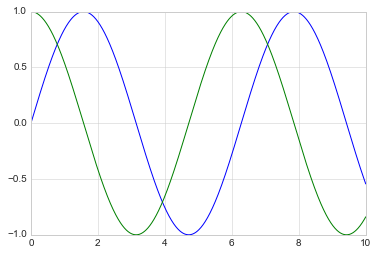

In [6]:
#Simple process
plt.style.use('seaborn-whitegrid') #Grid
#Object oriented approach
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000) #1000 linear points from 0 to 10
ax.plot(x,np.sin(x))
ax.plot(x,np.cos(x))

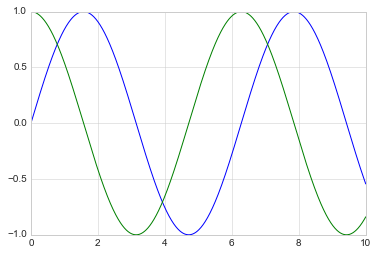

In [7]:
plt.plot(x,np.sin(x)) #MATLAB Approach
plt.plot(x,np.cos(x))

### Adjusting Color and Style

You can specify color by:
- _name:_ __'blue'__
- _hort color code (rgbcmyk):_ __'g'__
- _Grayscale between 0 and 1:_ __'0.75'__
- _Hex code (RRGGBB from 00 to FF):_ __'#FFDD44'__
- _RGB tuple, values 0 and 1:_ __(1.0,0.2,0.3)__
- _all HTML color names supported:_ __'chartreuse'__

And style can be the name as 'dotted' or the short code ':'

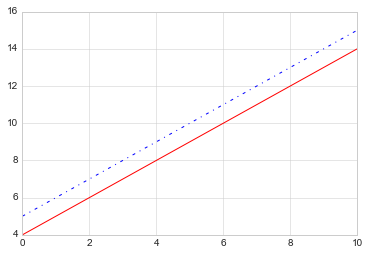

In [11]:
#Color and style
plt.plot(x, x+4, linestyle='-', color='red')
plt.plot(x, x+5, linestyle='-.', color = 'b')

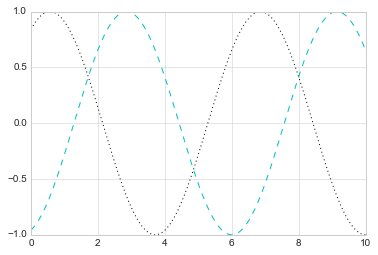

In [15]:
#Or you can combine them:
plt.plot(x, np.sin(x+1), ':k')
plt.plot(x, np.sin(x+5), '--c')

### Adjusting the plot

(1.5, -1.5)

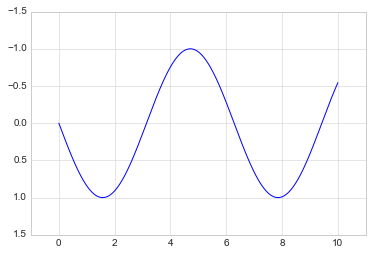

In [17]:
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(1.5,-1.5) #display in reverse
# you can use plt.axis([xmin,xmax,ymin,ymax])

(0.0, 10.0, -0.9999987979913133, 1.0)

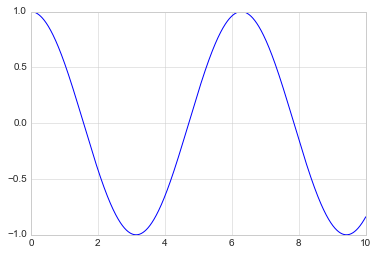

In [19]:
plt.plot(x,np.cos(x))
plt.axis('tight') #Automatically adjusts the axis

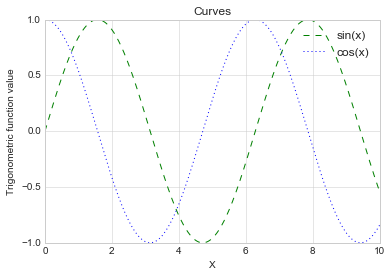

In [26]:
# Adding labels
plt.plot(x,np.sin(x), '--g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title('Curves')
plt.xlabel('X')
plt.ylabel('Trigonometric function value')
#plt.axis('equal')
plt.legend()

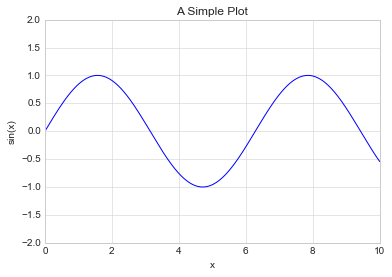

In [29]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10), ylim=(-2,2),
       xlabel='x',ylabel='sin(x)',
       title='A Simple Plot'); #; so it doesn't display the command

# Scatter Plots

(0, 1.8)

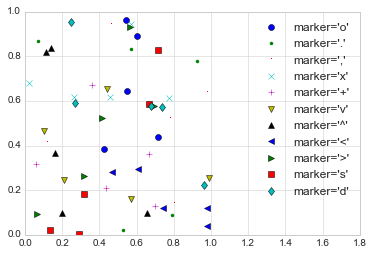

In [31]:
#Different points using a marker for each of the points - makes it scatter
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label = "marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0,1.8)

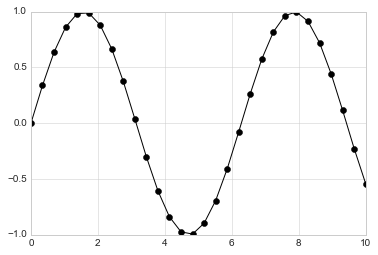

In [32]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x,y,'-ok') #line(-), circle marker(o), black(k)

Text(0,0.5,'sepal width (cm)')

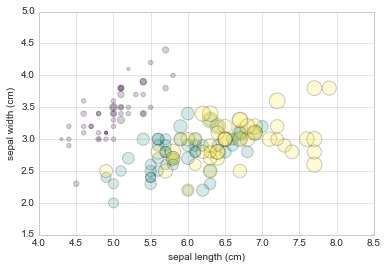

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
#c=colors, s=sizes
plt.scatter(features[0], features[1], alpha=0.2,s=100*features[3],
            c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Density and Contour Plots

In [34]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [35]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

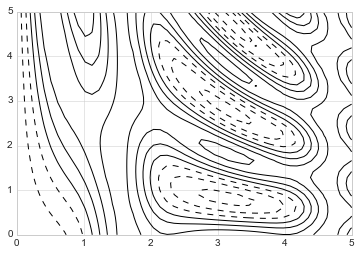

In [37]:
plt.contour(X,Y,Z,colors='black')

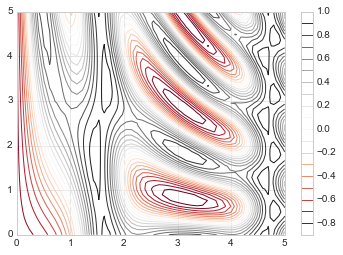

In [42]:
plt.contour(X,Y,Z,20,cmap='RdGy') #20 equally spaced intervals lines
plt.colorbar();

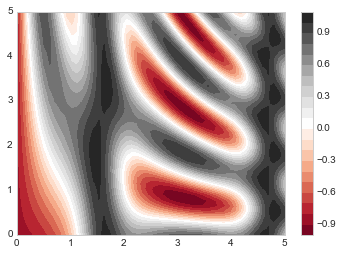

In [44]:
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar(); #Makes it easier to read peaks and valleys

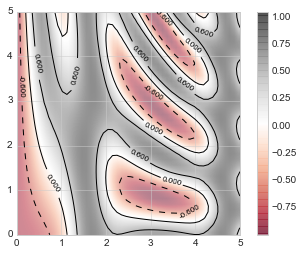

In [45]:
contours = plt.contour(X,Y,Z,3,colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0,5,0,5],origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

# Histograms

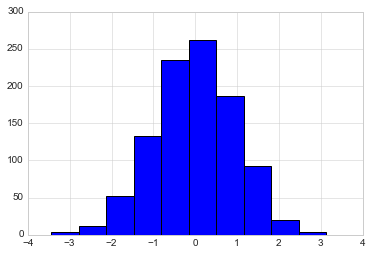

In [47]:
data = np.random.randn(1000)
plt.hist(data);

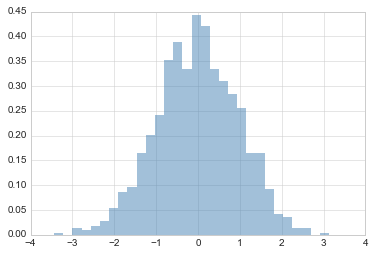

In [56]:
plt.hist(data,bins=30,alpha=0.5,density=True,histtype='stepfilled',
         color='steelblue', edgecolor='none');

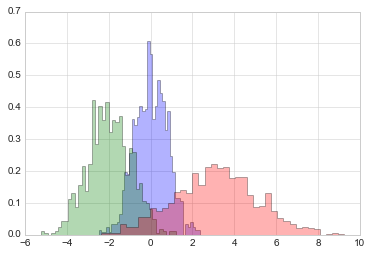

In [57]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)
kwargs = dict(histtype='stepfilled',density=True,alpha=0.3,bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [59]:
counts, bin_edges = np.histogram(data,bins=5) #compute histogram
print(counts)

[ 16 185 497 278  24]


#### Two-Dimensional Histograms

In [60]:
#Create data
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

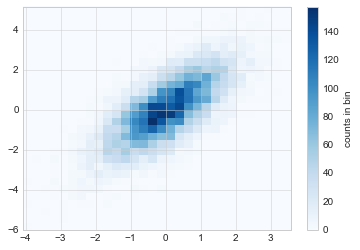

In [61]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

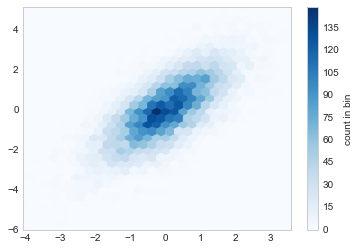

In [62]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb = plt.colorbar(label='count in bin')

# Customizing

#### Legends

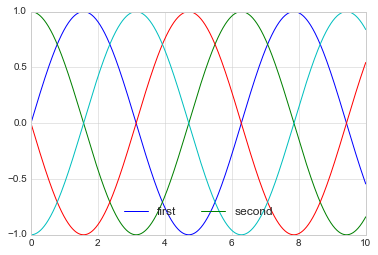

In [68]:
#legend method (for ax or plt) manages the labels
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0,2,0.5))
lines = plt.plot(x,y)
#lines is a list of plt.Line2D instances --- cool
plt.legend(lines[:2],['first','second'], loc='lower center', ncol=2, framealpha=1,
          borderpad=1);

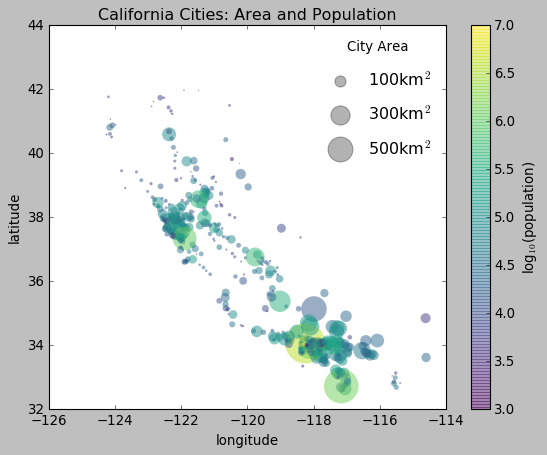

In [92]:
# Legend for Size of Points
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')
lat, lon = cities.latd, cities.longd
population, area = cities['population_total'], cities['area_total_km2']
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area,
           linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)
# Create legend for the size with empty lists
# "fake" scatter puts the objects in the area that legend can access
for area in [100, 300, 500]:
    plt.scatter([],[],c='k',alpha=0.3,s=area,label=str(area)+'km$^2$')
#The legend displays the points that have a label specified
plt.legend(scatterpoints=1, frameon=False, 
           labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');


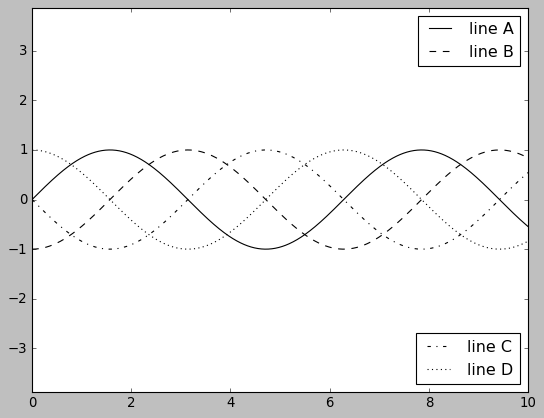

In [94]:
#Multiple Legends - Legend doesn't let you to put multiple legends, 
#so, there is a work-around
fig, ax = plt.subplots()
lines=[]
styles=['-','--','-.',':']
x=np.linspace(0,10,1000)
for i in range(4):
    lines+=ax.plot(x, np.sin(x-i*np.pi/2),styles[i],color='black')
ax.axis('equal')
ax.legend(lines[:2],['line A', 'line B'],loc='upper right')
#To create a second label, need to add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax,lines[2:],['line C', 'line D'],loc='lower right')
ax.add_artist(leg);

#### Colormaps

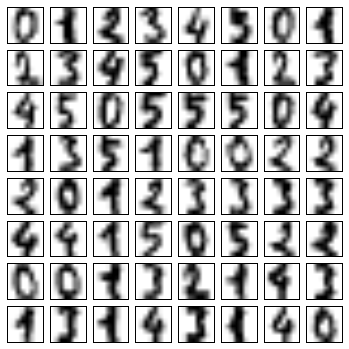

In [2]:
#The colormap is part of the Axis, all trics apply
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8,8,figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[],yticks=[])

In [3]:
# project the digits (originally in 64) into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
projection=iso.fit_transform(digits.data)

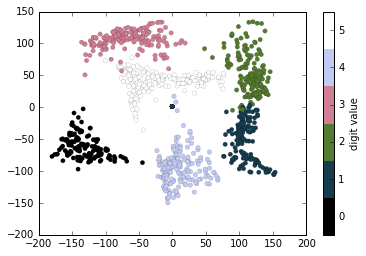

In [4]:
# plot the results
plt.scatter(projection[:,0], projection[:,1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6)) #discrete values
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

#### Ticks

__Locator Class__

_NullLocator:_ No ticks<br>
_FixedLocator:_ Tick locations are fixed<br>
_IndexLocator:_ Locator for index plots (e.g., where x = range(len(y)))<br>
_LinearLocator:_ Evenly spaced ticks from min to max<br>
_LogLocator:_ Logarithmically ticks from min to max<br>
_MultipleLocator:_ Ticks and range are a multiple of base<br>
_MaxNLocator:_ Finds up to a max number of ticks at nice locations<br>
_AutoLocator:_ (Default) MaxNLocator with simple defaults<br>
_AutoMinorLocator:_ Locator for minor ticks<br>

__Formatter Class__

_NullFormatter:_ No labels on the ticks<br>
_IndexFormatter:_ Set the strings from a list of labels<br>
_FixedFormatter:_ Set the strings manually for the labels<br>
_FuncFormatter:_ User-defined function sets the labels<br>
_FormatStrFormatter:_ Use a format string for each value<br>
_ScalarFormatter:_ (Default) Formatter for scalar values<br>
_LogFormatter:_ Default formatter for log axes<br>

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\usuario1\scikit_learn_data


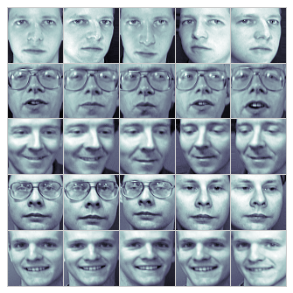

In [35]:
# Hiding ticks - For image plotting for instance
fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        # Make ticks invisible plt.NullLocator
        ax[i,j].xaxis.set_major_locator(plt.NullLocator()) 
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(faces[10*i+j],cmap='bone')

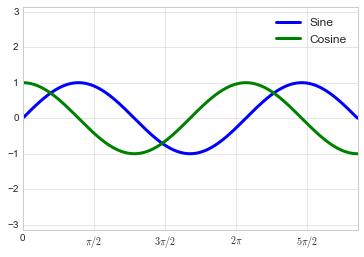

In [40]:
# Fancy ticking
fig, ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x, np.sin(x),lw=3, label='Sine')
ax.plot(x, np.cos(x),lw=3, label='Cosine')
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)

def format_func(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r"$\pi/2$"
    elif N == 1:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


# Subplotting

In [5]:
plt.style.use('seaborn-white')

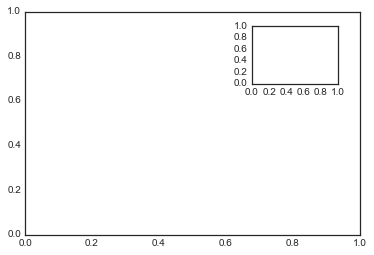

In [6]:
# Subplots by Hand
ax1=plt.axes()
ax2=plt.axes([0.65,0.65,0.2,0.2])

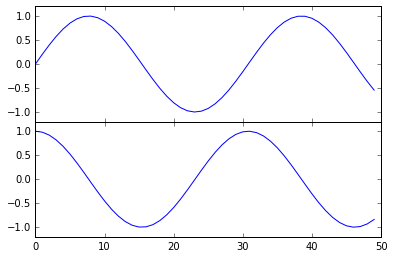

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],ylim=(-1.2,1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))
x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

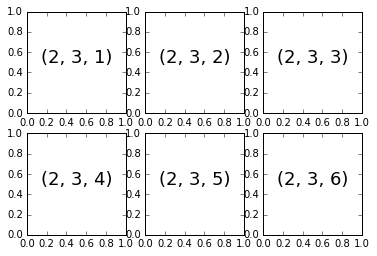

In [9]:
#Simple grids of subplots
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)), fontsize=18, ha='center')

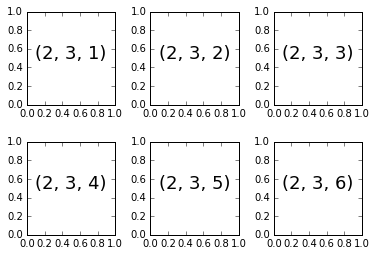

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4) #specify spacing
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)),fontsize=18,ha='center')

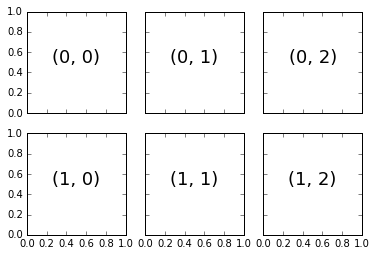

In [13]:
#plt.subplots: The Whole Grid in One Go
fig,ax=plt.subplots(2,3,sharex='col',sharey='row') 
#ax contains 2 dimensional arrays indexed by [row,col]
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=18, ha='center')

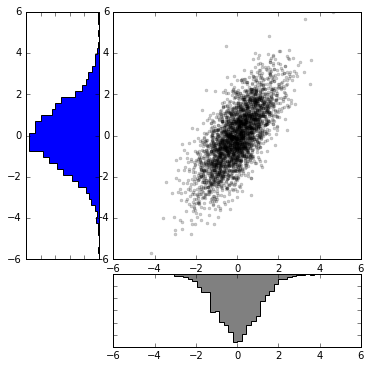

In [22]:
# More complicated arrangements
mean = [0,0]
cov =[[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

main_ax.plot(x,y,'ok',markersize=3,alpha=0.2)
x_hist.hist(x,40,histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y,40,histtype='stepfilled', orientation='horizontal', color='blue')
y_hist.invert_xaxis()

# Text and Annotation

In [24]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [25]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
                              births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

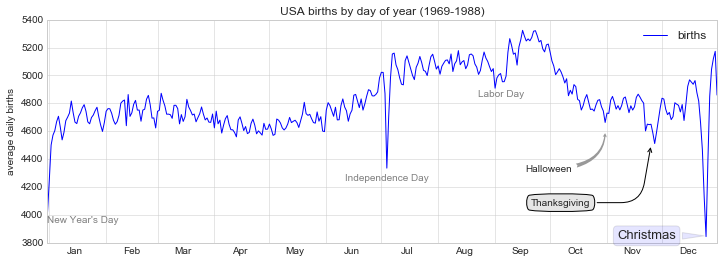

In [34]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
#ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
#ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
#ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

#Add Arrows to the texts with annotate
# xycords:data coordinates - arrowprops:type of arrow / shape and angles
# bbox: box for the text

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
             xytext=(-80, -40), textcoords='offset points',
             arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",
             connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
             xytext=(-120, -60), textcoords='offset points',
             bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', 
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

ax.set(title='USA births by day of year (1969-1988)', 
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

# Add